In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
#from bs4 import BeautifulSoup
from collections import defaultdict
#import requests
%matplotlib inline
from sklearn.svm import SVC
from nltk.stem.snowball import SnowballStemmer

## remove special symbol

def clean_text(df_tem3,col):
    df_tem3[col] = df_tem3[col].str.replace("&#039;",'\'')
    df_tem3[col] = df_tem3[col].str.replace("\"","").str.lower()
    df_tem3[col] = df_tem3[col].str.replace( r"(\\r)|(\\n)|(\\t)|(\\f)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(&#039;)|(\d\s)|(\d)|(\/)","")
    df_tem3[col] = df_tem3[col].str.replace("\"","").str.lower()
    df_tem3[col] = df_tem3[col].str.replace( r"(\$)|(\-)|(\\)|(\s{2,})"," ")
    df_tem3[col].sample(1).iloc[0]

    stemmer = SnowballStemmer('english')
    df_tem3[col] = df_tem3[col].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split(" ")]))
    return df_tem3[col]


np.random.seed(9)

In [118]:
df = pd.read_csv("../web_scrap.csv",index_col=0).drop_duplicates()


In [119]:
eight = clean_text(df,'8')
nine = clean_text(df,'9')
ten = clean_text(df,'10')

In [120]:
df_tem3 = eight + ' ' + nine+' '+ten

In [121]:
#y = ((df['3'] != ' No Side Effects') & (df['3'] != ' Mild Side Effects')).astype(int)
y = (df['3'] != ' No Side Effects').astype(int)
X = df_tem3

In [122]:
y.mean()

0.7084134615384615

In [123]:
for se_com in df[((df['3'] != ' No Side Effects') & (df['3'] != ' Mild Side Effects'))]['9'].sample(20):
    print(se_com+'\n')
    print("===========================")

 rais blood pressur dure the initi stage when increas doseag becam quit shaki at time and it appear to be hard to start to walk muscl seem to be hesit these disappear when stop take

 i develop an anorexia i stop eat and lost so much weight im about ft now and weigh about lbs which is realli skinni for my age and height if i wouldnt have stop i would be skin and bone i got to a point where i lost color and im now way too skinni anoth side effect that i develop is insomnia i have a veri hard time sleep i cant fall asleep until about and that everi night it horribl anoth side effect that veri serious is develop of depress i had to go on anti depress becaus of the drug about month after use adderal it depress you so much after school id get home and be so depress id cri and just feel so misser i was serious depress a fact that everyon should understand about adderal is that it in a way a watter down version of meth the side effect are the same but not as sever but it still bad it will mes

In [124]:
for se_com in df[~((df['3'] != ' No Side Effects') & (df['3'] != ' Mild Side Effects'))]['9'].sample(20):
    print(se_com+'\n')
    print("===========================")

 none

 if next dose not taken in a time manner effect wear off veri quick and sudden veri tire small bubbl in head at time if dosag even slight too high then notic heart palpit present along with increas heart rate activ dream if taken late in the day 

 i read the pamphlet and there are a few side effect such as dizzi but i didnt suffer ani

 the main side effect ive had is irregular period first it was annoy not know when my period when come then as my period becam less frequent it was actual kind of nice howev now i feel like about or day into my cycl i start to bloat like normal but dont start or get relief for about anoth thirti or so day so now i kinda feel like it bloat or acn to choos from

 have not experienc ani side effect except the plateau in visibl result

 none

 drowsi both the lexapro and the cymbalta make me tire dure the day neccesit a nap 

 mild nausea at first gradual disappear after about a month of treatment 

 slight discomfort of the prostat felt as though it

In [125]:
# Split Training & Test Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

In [126]:
import tensorflow as tf
import tensorflow 

#from tensorflow import tensorflow.keras

#from keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Bidirectional



# fix random seed for reproducibility

MAX_NB_WORDS = 500
max_review_length = 500
EMBEDDING_DIM = 160


In [127]:
# Tokenize the data
tokenizer = Tokenizer(num_words = MAX_NB_WORDS, 
                      filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',
                      lower=True, split=' ', char_level=False, 
                      oov_token=None, document_count=0)

tokenizer.fit_on_texts(X_train)
train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)

# truncate and pad input sequences
X_train = sequence.pad_sequences(train_sequences, maxlen=max_review_length)
X_test = sequence.pad_sequences(test_sequences, maxlen = max_review_length)

word_index = tokenizer.word_index

In [128]:
nb_words  = min(MAX_NB_WORDS, len(word_index))
lstm_out = max_review_length

model = Sequential()
model.add(Embedding(nb_words,EMBEDDING_DIM,input_length=max_review_length))
#model.add(Dropout(0.2))

## add conv using kernal No.32 and size 3x3, actiation='relu'(rm neg)
# model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool1D(pool_size=2))
model.add(Bidirectional(LSTM(20, return_sequences=True)))
#model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(20)))
#model.add(Attention(max_review_length))
model.add(Dense(1, activation = 'sigmoid'))

## one-code mutiple categories targets use 'categorical_crossentropy' not 'binary_crossentropy'
model.compile(loss='binary_crossentropy',optimizer='adam',metrics =['accuracy'])

In [129]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 160)          80000     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 500, 40)           28960     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 40)                9760      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 118,761
Trainable params: 118,761
Non-trainable params: 0
_________________________________________________________________


In [130]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Run LSTM Model
batch = 32 
epoch = 40

early_stopping = EarlyStopping(patience = 3)

LSTM_model = model.fit(X_train, y_train, batch_size=batch, epochs=epoch,
                       validation_split=0.2,callbacks=[early_stopping], shuffle = True)

best_score = min(LSTM_model.history['val_loss'])

/home/ubuntu/anaconda3/envs/amazonei_tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2662 samples, validate on 666 samples
Epoch 1/40
2662/2662 [==============================] - 58s 22ms/step - loss: 0.6069 - acc: 0.7074 - val_loss: 0.5553 - val_acc: 0.7402
Epoch 2/40
2662/2662 [==============================] - 53s 20ms/step - loss: 0.5058 - acc: 0.7615 - val_loss: 0.4667 - val_acc: 0.7913
Epoch 3/40
2662/2662 [==============================] - 53s 20ms/step - loss: 0.5431 - acc: 0.7524 - val_loss: 0.5438 - val_acc: 0.7583
Epoch 4/40
2662/2662 [==============================] - 54s 20ms/step - loss: 0.4667 - acc: 0.7874 - val_loss: 0.4975 - val_acc: 0.7883
Epoch 5/40
2662/2662 [==============================] - 54s 20ms/step - loss: 0.4165 - acc: 0.8264 - val_loss: 0.5002 - val_acc: 0.7778


In [131]:
LSTM_model_history = pd.DataFrame(LSTM_model.history)
file_name = "web_20_bilstm_2layer_se_nor_comm.csv"
LSTM_model_history.to_csv( file_name)

In [132]:
print(LSTM_model_history)

        acc      loss   val_acc  val_loss
0  0.707363  0.606871  0.740240  0.555329
1  0.761458  0.505801  0.791291  0.466672
2  0.752442  0.543142  0.758258  0.543753
3  0.787378  0.466679  0.788288  0.497545
4  0.826446  0.416461  0.777778  0.500160


In [133]:
#model.save("web_20_bilstm_2layer.h5")

Text(0.5,0,'epoch')

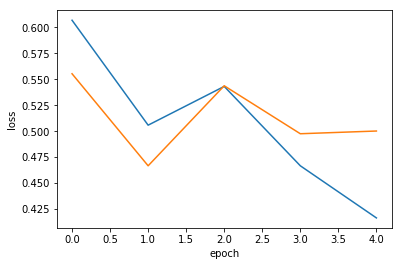

In [134]:
plt.plot(LSTM_model.history['loss'],label='train')
plt.plot(LSTM_model.history['val_loss'],label='validation')
plt.ylabel("loss")
plt.xlabel("epoch")

In [135]:
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import load_model
#model = load_model("web_20_bilstm_2layer.h5")
#LSTM_model = model.fit(X_train, y_train, batch_size=batch, epochs=epoch)

accr = model.evaluate(X_test,y_test, batch_size = 100)
accr

832/832 [==============================] - 2s 2ms/step


[0.4880287704559473, 0.7872596168174193]

In [136]:
#             acc      loss   val_acc  val_loss
#     0  0.670173  0.597171  0.770270  0.465685
#     1  0.800902  0.425928  0.779279  0.446773
#     2  0.849737  0.355651  0.794294  0.434360
#     3  0.869647  0.318369  0.800300  0.442692
#     4  0.886927  0.287467  0.801802  0.473488
#     5  0.900826  0.256769  0.792793  0.538440

#     [0.9755449504233323, 0.6394230763499553]

#     array([[373, 133],
#            [167, 159]])

In [137]:
y_test_pred = model.predict_classes(X_test)

In [139]:
y_test_pro = model.predict_proba(X_test)

0.8006828851899275


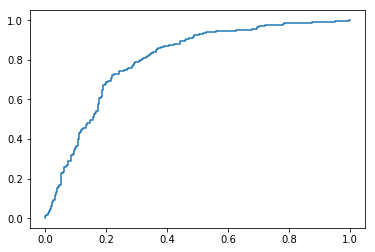

In [147]:
from sklearn.metrics import roc_auc_score, roc_curve
print(roc_auc_score(y_test,y_test_pro))
fpr, tpr, thre = roc_curve(y_test,y_test_pro)

plt.plot(fpr,tpr)

In [138]:
confusion_matrix(y_test,y_test_pred)

array([[137, 127],
       [ 50, 518]])

In [149]:
roc_curve(y_test,y_test_pro)

(array([0.        , 0.        , 0.00378788, 0.00378788, 0.00757576,
        0.00757576, 0.01136364, 0.01136364, 0.01515152, 0.01515152,
        0.01893939, 0.01893939, 0.02272727, 0.02272727, 0.02651515,
        0.02651515, 0.03030303, 0.03030303, 0.03409091, 0.03409091,
        0.03787879, 0.03787879, 0.04166667, 0.04166667, 0.04545455,
        0.04545455, 0.04924242, 0.04924242, 0.0530303 , 0.0530303 ,
        0.05681818, 0.05681818, 0.06060606, 0.06060606, 0.06439394,
        0.06439394, 0.06818182, 0.06818182, 0.0719697 , 0.0719697 ,
        0.07575758, 0.07575758, 0.08333333, 0.08333333, 0.09090909,
        0.09090909, 0.09469697, 0.09469697, 0.09848485, 0.09848485,
        0.10227273, 0.10227273, 0.10606061, 0.10606061, 0.10984848,
        0.10984848, 0.11363636, 0.11363636, 0.11742424, 0.11742424,
        0.12121212, 0.12121212, 0.125     , 0.125     , 0.13257576,
        0.13257576, 0.13636364, 0.13636364, 0.14772727, 0.14772727,
        0.15151515, 0.15151515, 0.15530303, 0.15

## predict sentence

In [85]:
first_quest2 = pd.read_csv("../wit_ai_sentment/SE_tem_l400_first_request.ccv",index_col=0)

In [86]:
y_wit = ((first_quest2['value'] == "negative")).astype(int)
X_wit = clean_text(first_quest2,'text')

In [87]:
X_wit_sequences = tokenizer.texts_to_sequences(X_wit)
X_wit_trans = sequence.pad_sequences(X_wit_sequences, maxlen = max_review_length)


In [88]:
accr = model.evaluate(X_wit_trans,y_wit, batch_size = 100)
accr

30689/30689 [==============================] - 70s 2ms/step


[0.9985925791499676, 0.5505881541060184]

In [89]:
y_test_pred = model.predict_classes(X_wit_trans)
confusion_matrix(y_wit,y_test_pred)

array([[ 2943, 10981],
       [ 2811, 13954]])

In [90]:
## [1.620907984605271, 0.5002443838369665]
## array([[11736,  2188],
##       [13149,  3616]])

In [91]:
for sen in X_wit[y_test_pred.flatten() == 1].sample(10):
    print(sen+"\n")
    print("==================================")

the first month was fine no side effect irrit or pregnanc scare or anyth but then the second month i start experienc nausea cramp my period was late and then i had the absolut worst depress and even start lose touch with realiti

howeverth side effect are extrem intens for me

just dont know if i can keep deal with all these side effect

that be said i am more anxious than i have ever been due to side effect

i have gain weight in all the right place and havent had ani horribl side effect

have been almost complet free of symptom and have no obvious side effect

side effect of other ssris as a male the sexual side effect a minut

i have tri adipex and the weight come off faster howev the side effect are a lot more aggress belviq side effect are bare notic

for me side effect are infrequ and usual veri minor sleepi dizzi &ldquo side effect post headach i would sometim experi a feel of euphoria combin with a difficulti concentr

the onli side effect i had were some appetit loss which was

In [92]:
## 8/10(7.5/10)

In [93]:
for sen in X_wit[y_test_pred.flatten() == 0].sample(10):
    print(sen+"\n")
    print("==================================")

i wish the doctor would go over all side effect when then prescrib medic so you know when someth start to happen that it is the medic

i have experienc no side effect at all

i notic in my case thus far it has increas my desir for sweet margin no other notic side effect yet it definit is an more viabl replac for lasix potassium combin with less side effect

no side effect and saw an immedi improv as well as a more peac state of mind which may or may not be in my head but i dont care

our pediatrician refer us to a psychiatrist as he had never experienc this side effect and the psych said that it was due to the pdd if it hadnt been for the side effect the intuniv work quit well

the onli side effect that ive had from this medicin is difficulti sleep and race thought

no notic side effect i am a retir regist nurs

i have some side effect and it is easi to deal with im abl to deal with the side effect as long as im abl to keep my famili

i have had no side effect from this medic

ive been

In [94]:
## 5/10 (5.5/10)

## predict comments with wit lableled

In [95]:
drugsComTrain = pd.read_csv('../drugsCom_raw/drugsComTrain_raw.tsv',sep='\t',index_col=0)#.sample(40000)


In [96]:
first_quest3 = pd.merge(first_quest2,drugsComTrain,left_index=True,right_index=True,how='left')
y_wit = ((first_quest3['value'] == "negative")).astype(int)
X_wit = clean_text(first_quest3,'review')

In [97]:
X_wit_sequences = tokenizer.texts_to_sequences(X_wit)
X_wit_trans = sequence.pad_sequences(X_wit_sequences, maxlen = max_review_length)

accr = model.evaluate(X_wit_trans,y_wit, batch_size = 100)
accr

30689/30689 [==============================] - 70s 2ms/step


[1.0206916154881773, 0.5631333659279362]

In [98]:
y_test_pred = model.predict_classes(X_wit_trans)
confusion_matrix(y_wit,y_test_pred)

array([[ 6214,  7710],
       [ 5697, 11068]])

In [99]:
for sen in X_wit[y_test_pred.flatten() == 1].sample(10):
    print(sen+"\n")
    print("==================================")

i was on loestrin for around a year and i need to get off of it becaus it made me veri depress i was alway moodi and upset and two of my friend told me that loestrin made them feel like it too ive been off of it for about two month now and i feel so much better other than the depress there werent mani bad side effect i just couldnt deal with the mood chang

i bought this  month befor i got marri and had veri littl side effect i have been marri year and i havent gotten pregnant yet i think the onli annoy is that my period come everi other month and that i get some spot off and on throughout the month my period are shorter and there is less bleed which is a nice thing i havent taken ani other birth control but im think of switch to a cervic cap a year befor we want to have kid so i can get my hormon regul correct again

i have taken abilifi for one year it was prescrib as an add on to cymbalta after a suicid attempt i feel it boost my mood but i have gain pound i cant imagin continu on a

In [100]:
## 8/10(7.5/10)

In [101]:
for sen in X_wit[y_test_pred.flatten() == 0].sample(10):
    print(sen+"\n")
    print("==================================")

my doctor recommend the nuvar to me after i told her how i didnt like take birth control pill becaus i forget and also i had no sex drive while on the pill i put the nuvar in and within hrs i had sever vomit fever &amp muscl fatigu this was liter the worst experi i have ever had with birth control at first i didnt understand what was happen to me till i look at the side effect on the pamphlet my doctor gave me i immedi took it out and within  hrs i stop vomit but still veri weak and frail i had a sever allerg reaction to the nuvar and later found out that my bodi react negat to estrogen and progesteron from my new doctor im go to tri the copper iud

okay so i never thought id ever write one of these review but here goe i ask my doctor about phentermin after have a veri hard time lose weight under his monitor for year im young onli and &quot so it shouldnt be this hard i start on mg back in may of clock in at lbs with complet diet chang and moderatehigh level exercis x a week i now weig

In [102]:
# 7/10

## predict comments without wit lableled

In [103]:
test = pd.read_csv("../drugsCom_raw/drugsComTest_raw.tsv",sep='\t', index_col=0)
X_wit = clean_text(test,'review')

In [104]:
X_wit_sequences = tokenizer.texts_to_sequences(X_wit)
X_wit_trans = sequence.pad_sequences(X_wit_sequences, maxlen = max_review_length)

In [105]:
y_test_pred = model.predict_classes(X_wit_trans)

In [106]:
for sen in X_wit[y_test_pred.flatten() == 1].sample(10):
    print(sen+"\n")
    print("==================================")

the side effect today i went to the dr with symptom of cloudi urin and frequent urin i was diagnos with a bladder infect and i was prescrib macrobid x po daili for day ive taken this medic befor for a uti and i was fine but for some reason i took this pill hour ago and alreadi i feel the sensat to gag everi time a breath in this kind of nausea feel detest im so uncomfort i also got sever back pain and tight chest out of nowher i cant believ this

i have read negat review about the pill and it made me afraid to tri it now ive come here and read negat review about the shot that i had a pretti good experi with the pros for me was the shot stop my period for year and i love it i onli had to take it everi three month i dont recal have ani mood swing the con were the weight i gain i was alway at sinc junior high school but about six month after be on the shot when i was about year old i pick up a ton of weight i went from to in two year of be on it when i stop take the shot the transit was p

In [107]:
for sen in X_wit[y_test_pred.flatten() == 0].sample(10):
    print(sen+"\n")
    print("==================================")

i am so grate for tamiflu right now i havent been nauseous with the flu but tamiflu along with duraflu has cut my symptom by % in one day the onli side effect i have had from this medicin might be slight diarrhea but noth too bad definit recommend but it veri expens without insur  

it amaz how well this actual work i thought i would be stuck with anxieti forev and wonder how i would ever be abl to finish uni and find a job this complet got rid of my social anxieti as well as all the physic symptom that came with it i can talk with peopl normal and for onc have some hope that my life could actual turn out well no more random panic attack or worri about minor thing either no side effect of ani sort i wish i had taken this back in high school when i was first prescrib it but i was too anxious to tri ani medicin

i have been on yaz for and a half year and it been the best form of contracept medic for me i have tri other contracept pill and have had all kind of bad side effect but onc i st

In [48]:
## 7/10 (6.5/10)

In [113]:
test2  = pd.read_csv("../drugsCom_raw/drugsComTest_raw.tsv",sep='\t', index_col=0)
test2['review'].sample(10)

for sen in test2['review'].sample(10):
    print(sen+"\n")
    print("==================================")

"I started suffering very badly from hot flashes about 2 years ago. When I would work out and do cardio, I would literally leave puddles. It was scary because I didn&#039;t know what was going on at the time. Someone I met recommended I try it. I was suffering so bad, I didn&#039;t want to be on antidepressants, but I was desperate. I didn&#039;t have to wait long, I went from having about six hot flashes a day, lasting about two to three minutes, to having three or four mini flashes. I was incredibly grateful, was able to sleep through the night as well. Just recently, they started to become unbearable again, so they increased the dosage. Really does work. Currently on 150 milligrams. I may have one or two flashes during the day and and maybe two at night"

"I got the mirena after giving birth about 7 weeks post partum. I bleed terribly almost every day.  Terrible back pains and no energy. Sex went out the window. My doc said to give it three months to regulate but this sucks. I&#039;